# Plot Spectra

Routines for loading mineral data, as well as calculating and plotting track-length spectra and information fluxes.

Let's start by importing matplotlib and some other libraries:

In [1]:
%matplotlib inline

In [2]:
import numpy as np

from matplotlib import pyplot as plt
from matplotlib.ticker import LogLocator

import matplotlib as mpl
from matplotlib import rc
rc('text', usetex=True)
rc('font',**{'family':'sans-serif','sans-serif':['cmr']})
rc('font',**{'family':'serif','serif':['cmr']})
rc('font', size=16)

mpl.rcParams['xtick.top'] = True
mpl.rcParams['ytick.right'] = True


import paleo.paleopy as paleopy

import swordfish as sf

#### Code for plotting spectra

Routine for plotting the recoil track spectrum for a given mineral.

In [3]:
def plotSpectrum(mineral):
    
    x_bins = np.logspace(0,3,100)

    plt.figure(figsize=(7,5))

    plt.title(mineral.name)

    # Signal spectrum for a given DM cross section and mass
    plt.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 5), label=r'$5\,\mathrm{GeV}$')
    plt.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 50), label=r'$50\,\mathrm{GeV}$')
    plt.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 500), label=r'$500\,\mathrm{GeV}$')

    # Background spectrum for neutrinos
    plt.loglog(x_bins[:-1], mineral.dRdx_nu(x_bins), linestyle='--',label=r'Neutrinos')

    # Neutron-induced backgrounds
    plt.loglog(x_bins[:-1], mineral.dRdx_neutrons(x_bins), linestyle=':', label='Neutrons')
    
    #Plot the line from Thorium
    x_Th = mineral.xT_Thorium()
    plt.loglog([x_Th, x_Th], [1e-10, mineral.norm_Thorium(T=1e7)], linestyle='-.',label=r'$1\alpha$-Thorium')

    plt.legend(fontsize=12)

    ax = plt.gca()
    plt.text(0.05, 0.9, r"$\sigma_p^{\mathrm{SI}}=10^{-45}\,\mathrm{cm}^2$",fontsize=16.0, transform=ax.transAxes)
    
    plt.ylabel("dR/dx [1/nm/kg/Myr]")
    plt.xlabel("x [nm]")
    plt.ylim(1e-4,1e10)
    plt.xlim(1,1000)

    plt.savefig("../plots/" + mineral.name + "_spectra.pdf",bbox_inches="tight")

    plt.show()

### Sinjarite

Mineral name: Sinjarite
    N_nuclei: 4
    Molar mass: 146.9  g/mol
    nucleus 	*	 abun.  *	 (N_p, N_n)
 **************************************************
    Ca		*	0.2722940776038121	*	(20.0, 20.0)
    H		*	0.02722940776038121	*	(1.0, 0.0)
    Cl		*	0.48264125255275697	*	(17.0, 18.45)
    O		*	0.21783526208304968	*	(8.0, 8.0)
Plotting SRIM data for Sinjarite:


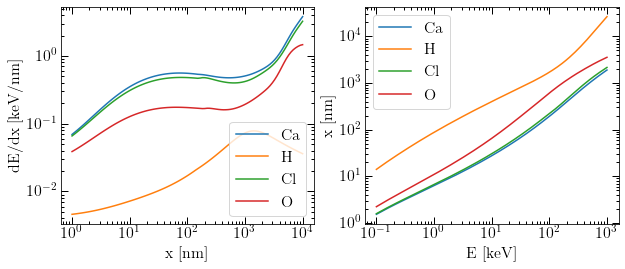

In [4]:
Sinj = paleopy.Mineral("Sinjarite")
Sinj.showProperties()
Sinj.showSRIM()

 DMutils.py: Loading neutrino flux for the first time...
Loading neutrino fluxes for...
    DSNB
    atm
    hep
    8B
    15O
    17F
    pep
    13N
    pp
    7Be-384
    7Be-861
...done.


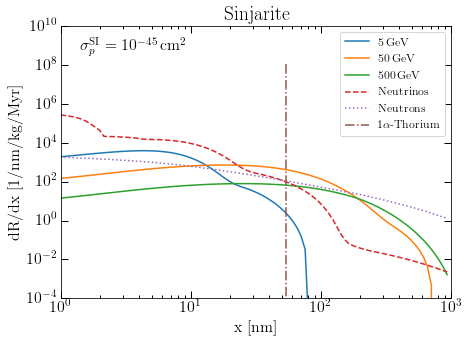

In [5]:
plotSpectrum(Sinj)

### Olivine

Mineral name: Olivine
    N_nuclei: 4
    Molar mass: 153.22  g/mol
    nucleus 	*	 abun.  *	 (N_p, N_n)
 **************************************************
    Mg		*	0.25375277378932254	*	(12.0, 12.3)
    Fe		*	0.14580341991907064	*	(26.0, 29.85)
    Si		*	0.18274376713222817	*	(14.0, 14.0)
    O		*	0.4177000391593787	*	(8.0, 8.0)
Plotting SRIM data for Olivine:


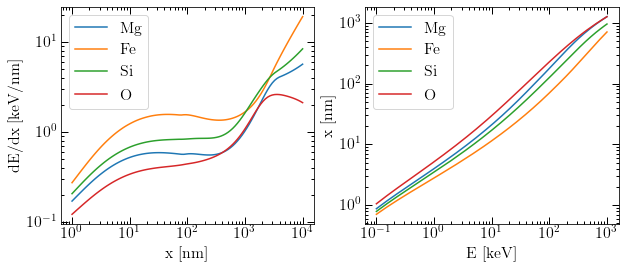

In [6]:
Oliv = paleopy.Mineral("Olivine")
Oliv.showProperties()
Oliv.showSRIM()

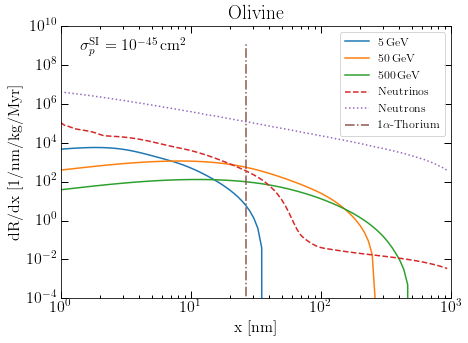

In [7]:
plotSpectrum(Oliv)

### Halite

Mineral name: Halite
    N_nuclei: 2
    Molar mass: 58.45  g/mol
    nucleus 	*	 abun.  *	 (N_p, N_n)
 **************************************************
    Na		*	0.39349871685201027	*	(11.0, 12.0)
    Cl		*	0.6065012831479898	*	(17.0, 18.45)
Plotting SRIM data for Halite:


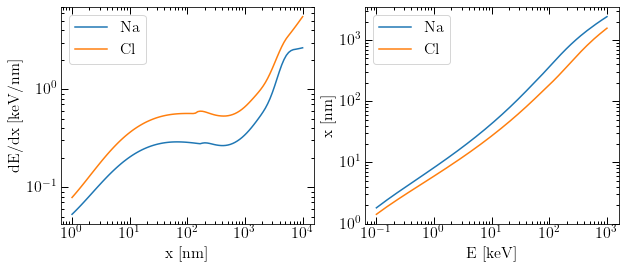

In [8]:
Hal = paleopy.Mineral("Halite")
Hal.showProperties()
Hal.showSRIM()

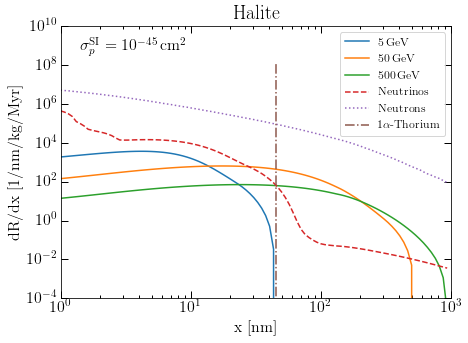

In [9]:
plotSpectrum(Hal)

### Nchwaningite

Mineral name: Nchwaningite
    N_nuclei: 4
    Molar mass: 238.0  g/mol
    nucleus 	*	 abun.  *	 (N_p, N_n)
 **************************************************
    Mn		*	0.46218487394957986	*	(25.0, 30.0)
    Si		*	0.11764705882352941	*	(14.0, 14.0)
    O		*	0.40336134453781514	*	(8.0, 8.0)
    H		*	0.01680672268907563	*	(1.0, 0.0)
Plotting SRIM data for Nchwaningite:


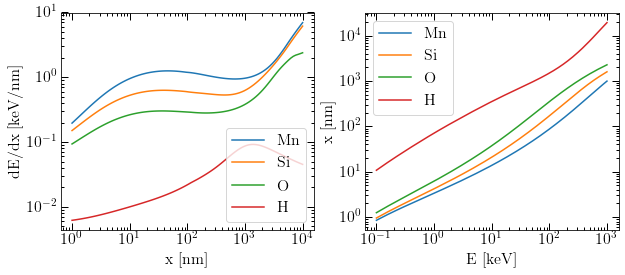

In [10]:
Nchw = paleopy.Mineral("Nchwaningite")
Nchw.showProperties()
Nchw.showSRIM()

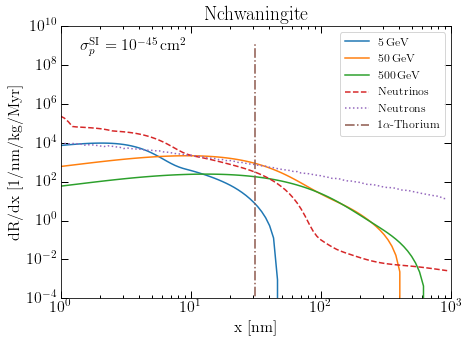

In [11]:
plotSpectrum(Nchw)

----
## Combined information flux and spectra plots

In [12]:
def MakeSF(mineral, sigma, exposure):
    systematics = [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1e-2, 1e-2]
    dRdx_BG = paleopy.GetBackground(mineral, sigma)
    SF = sf.Swordfish(dRdx_BG, T=systematics, E=np.ones_like(dRdx_BG[0])*exposure)
    return SF

We'll set up `swordfish` objects for the high-resolution case (note, this might take a minute or so):

In [13]:
print("Catching some Swordfish with Sinjarite...")
SF_Sinj_1nm = MakeSF(Sinj, 1.0, 0.01)
#SF_Sinj_15nm = MakeSF(Sinj, 15.0, 100.0)
print("...done.")

print("Catching some Swordfish with Olivine...")
SF_Oliv_1nm = MakeSF(Oliv, 1.0, 0.01)
#SF_Oliv_15nm = MakeSF(Oliv, 15.0, 100.0)
print("...done.")

print("Catching some Swordfish with Halite...")
SF_Hal_1nm = MakeSF(Hal, 1.0, 0.01)
#SF_Hal_15nm = MakeSF(Hal, 15.0, 100.0)
print("...done.")

print("Catching some Swordfish with Nchwaningite...")
SF_Nchw_1nm = MakeSF(Nchw, 1.0, 0.01)
#SF_Nchw_15nm = MakeSF(Nchw, 15.0, 100.0)
print("...done.")

Catching some Swordfish with Sinjarite...


/Users/bradkav/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  warnings.warn(msg, IntegrationWarning)


...done.
Catching some Swordfish with Olivine...
...done.
Catching some Swordfish with Halite...


/Users/bradkav/anaconda3/lib/python3.6/site-packages/scipy/integrate/quadpack.py:385: IntegrationWarning: The occurrence of roundoff error is detected, which prevents 
  the requested tolerance from being achieved.  The error may be 
  underestimated.
  warnings.warn(msg, IntegrationWarning)


...done.
Catching some Swordfish with Nchwaningite...
...done.


In [14]:
def GetInformationFlux(mineral, m_x, sigma_x, exposure, SF):
    ref_sig = 1e-45
    sig = paleopy.GetSignal(mineral, sigma_x, m_DM=m_x, xsec=ref_sig)
    flux = SF.infoflux(sig)
    
    return flux

Code for plotting the combined information flux and spectra

In [15]:
mlist_1 = [5, 50, 500]


def PlotSpectrumAndIF(mineral, sigma_x, exposure, SF, flux, title_text):
    
    x_bins = np.logspace(0,3,100)

    
    plt.figure(figsize=(7,6))
    
    grid = plt.GridSpec(3, 1, wspace=0.1, hspace=0.00)
    ax1 = plt.subplot(grid[0, :])
    ax2 = plt.subplot(grid[1:,:])
    
    #Top panel
    ax1.get_xaxis().tick_top()
    ax1.tick_params(labeltop=False)
    
    ax1.set_xscale("log")
    ax1.set_yscale("log")
    
    for i in range(3):
        ax1.plot(paleopy.calcBins(sigma_x)[:-1] + sigma_x/2, flux[i])

    ax1.set_ylabel("Info. Flux [A.U.]")
    ax1.set_ylim(1e-6, 1e4)
    ax1.set_xlim(1, 1000)
    
    ax1.set_yticks(np.logspace(-6, 3, 10), minor=True)
    ax1.set_yticklabels([], minor=True)
        
    #Bottom panel
    ax2.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 5), label=r'$m_\chi = 5\,\mathrm{GeV}$')
    ax2.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 50), label=r'$m_\chi = 50\,\mathrm{GeV}$')
    ax2.loglog(x_bins[:-1], mineral.dRdx(x_bins, 1e-45, 500), label=r'$m_\chi = 500\,\mathrm{GeV}$')

    ax2.loglog(x_bins[:-1], mineral.dRdx_nu(x_bins), linestyle='--',label=r'Neutrinos')

    ax2.loglog(x_bins[:-1], mineral.dRdx_neutrons(x_bins), linestyle=':', label='Neutrons')
    
    #Plot the line from Thorium [mineral.norm_Thorium(T=1e7)]
    x_Th = mineral.xT_Thorium()
    ax2.loglog([x_Th, x_Th], [1e-10, 1e12], dashes=[10,2],label=r'$1\alpha$-Thorium')

    ax2.legend(fontsize=13)
    
    ax2.set_ylim(1e-3, 1e11)
    ax2.set_xlim(1, 1000)
    
    ax2.set_yticks(np.logspace(-3, 10, 14), minor=True)
    ax2.set_yticklabels([], minor=True)
    
    ax2.set_xlabel(r"$x_T ~[\mathrm{nm}]$")
    ax2.set_ylabel(r"$\mathrm{d}R/\mathrm{d}x_T$ [$\mathrm{nm}^{-1} \,\mathrm{kg}^{-1}\,\mathrm{Myr}^{-1}$]")
    
    ax2.text(0.05, 0.85, r"$\sigma_n^{\mathrm{SI}}=10^{-45}\,\mathrm{cm}^2$",fontsize=16.0, transform=ax2.transAxes)
    
    
    ax1.set_title(title_text)
    
    outfile = '../plots/SpectrumAndIF_' + mineral.name + '_exp' + str(exposure) + '_sig' + str(sigma_x) + '.pdf'
    plt.savefig(outfile, bbox_inches="tight")
    plt.show()



First, we should calculate the information flux for the high-resolution case, using the swordfish objects we generated earlier:

In [16]:
IF_Nchw = [GetInformationFlux(Nchw, mx, 1.0, 0.01, SF_Nchw_1nm) for mx in mlist_1]  
IF_Hal = [GetInformationFlux(Hal, mx, 1.0, 0.01, SF_Hal_1nm) for mx in mlist_1] 
IF_Oliv = [GetInformationFlux(Oliv, mx, 1.0, 0.01, SF_Oliv_1nm) for mx in mlist_1]  
IF_Sinj = [GetInformationFlux(Sinj, mx, 1.0, 0.01, SF_Sinj_1nm) for mx in mlist_1]  

Now we can plot everything:

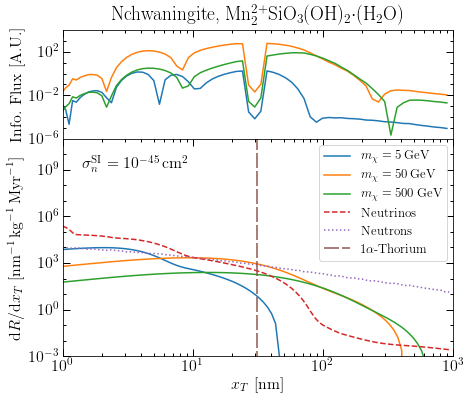

In [17]:
PlotSpectrumAndIF(Nchw, 1.0, 0.01, SF_Nchw_1nm, IF_Nchw, title_text = r"Nchwaningite, Mn$^{2+}_2$SiO$_3$(OH)$_2$$\cdot$(H$_2$O)")

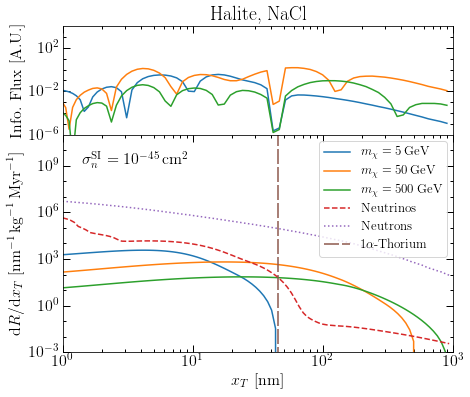

In [18]:
PlotSpectrumAndIF(Hal, 1.0, 0.01, SF_Hal_1nm, IF_Hal, title_text = r"Halite, NaCl")

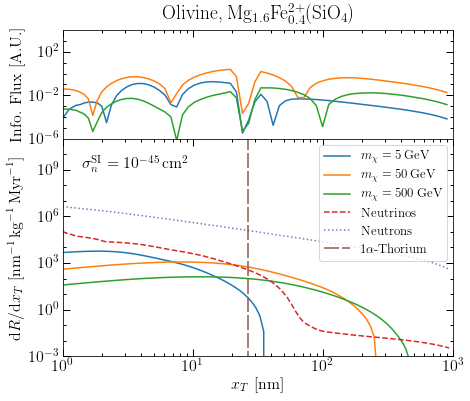

In [19]:
PlotSpectrumAndIF(Oliv, 1.0, 0.01, SF_Oliv_1nm, IF_Oliv, title_text = r"Olivine, Mg$_{1.6}$Fe$^{2+}_{0.4}$(SiO$_4$)")

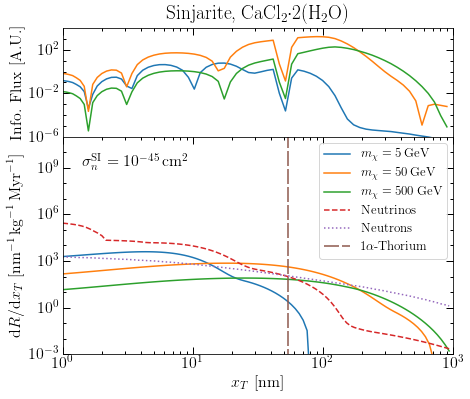

In [20]:
PlotSpectrumAndIF(Sinj, 1.0, 0.01, SF_Sinj_1nm, IF_Sinj, title_text = r"Sinjarite, CaCl$_2\cdot$2(H$_2$O)")